In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = [0.5, 2.5]
Y = [0.2, 0.9]

def grad_w(w, b, x, y):
    return 2 * (w * x + b - y) * x

def grad_b(w, b, x, y):
    return 2 * (w * x + b - y)

In [ ]:
def visualize_optimization(w_history, b_history, title):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(w_history)
    plt.title(f'Weight (w) Changes Over Epochs ({title})')
    plt.xlabel('Epoch')
    plt.ylabel('Weight (w)')

    plt.subplot(2, 1, 2)
    plt.plot(b_history)
    plt.title(f'Bias (b) Changes Over Epochs ({title})')
    plt.xlabel('Epoch')
    plt.ylabel('Bias (b)')

    plt.tight_layout()
    plt.show()

In [ ]:
def mini_batch_gradient_descent(X, Y, w, b, epoch, n, batch_size):
    w_history, b_history = [], []
    sample_no = 0  # Initialize sample_no before the epoch loop
    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
            sample_no += 1
            if sample_no % batch_size == 0:
                w -= n * dw
                b -= n * db
                dw, db = 0, 0
        w_history.append(w)
        b_history.append(b)
    print(f'Mini-Batch Gradient Descent: w = {round(w,3)}, b = {round(b,3)}')
    visualize_optimization(w_history, b_history, 'Mini-Batch GD')

In [ ]:
def momentum_gradient_descent(X, Y, w, b, epoch, n, beta):
    w_history, b_history = [], []  # Lists to store weight and bias values over epochs
    vw, vb = 0, 0
    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        vw = beta * vw + (1 - beta) * dw
        vb = beta * vb + (1 - beta) * db
        w -= n * vw
        b -= n * vb
        w_history.append(w)
        b_history.append(b)
    print(f'Momentum Gradient Descent: w = {round(w, 2)}, b = {round(b, 2)}')
    visualize_optimization(w_history, b_history, 'Momentum GD')


In [ ]:
def adaGrad_gradient_descent(X, Y, w, b, epoch, n, eps):
    w_history, b_history = [], []
    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
        w -= n * dw / (np.sqrt(dw**2 + eps))
        w_history.append(w)
        b_history.append(b)
    print(f'AdaGrad Gradient Descent: w = {round(w, 2)}, b = {round(b, 2)}')
    visualize_optimization(w_history, b_history, 'AdaGrad GD')

In [ ]:
def NAG_gradient_descent(X, Y, w, b, epoch, n, beta):
    w_history, b_history = [], []
    for i in range(epoch):
        dw, db, vw, vb = 0, 0, 0, 0
        vw = beta * vw
        w_temp = w - vw
        for x, y in zip(X, Y):
            dw += grad_w(w_temp, b, x, y)
        w -= n * dw
        w_history.append(w)
        b_history.append(b)
    print(f'NAG Gradient Descent: w = {round(w, 2)}, b = {round(b, 2)}')
    visualize_optimization(w_history, b_history, 'NAG GD')

In [ ]:
def Adam(X, Y, w, b, epoch, n, eps, beta1, beta2):
    w_history, b_history = [], []  # Lists to store weight and bias values over epochs
    vw, vb, vww, vbb = 0, 0, 0, 0
    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        vw = beta1 * vw + (1 - beta1) * dw
        vww = beta2 * vww + (1 - beta2) * dw**2
        vb = beta1 * vb + (1 - beta1) * db
        vbb = beta2 * vbb + (1 - beta2) * db**2
        w -= n * vw / (np.sqrt(vww) + eps)
        b -= n * vb / (np.sqrt(vbb) + eps)
        w_history.append(w)
        b_history.append(b)
    print(f'Adam Optimization: w = {round(w, 2)}, b = {round(b, 2)}')
    visualize_optimization(w_history, b_history, 'Adam')

Mini-Batch Gradient Descent: w = 0.192, b = 0.087


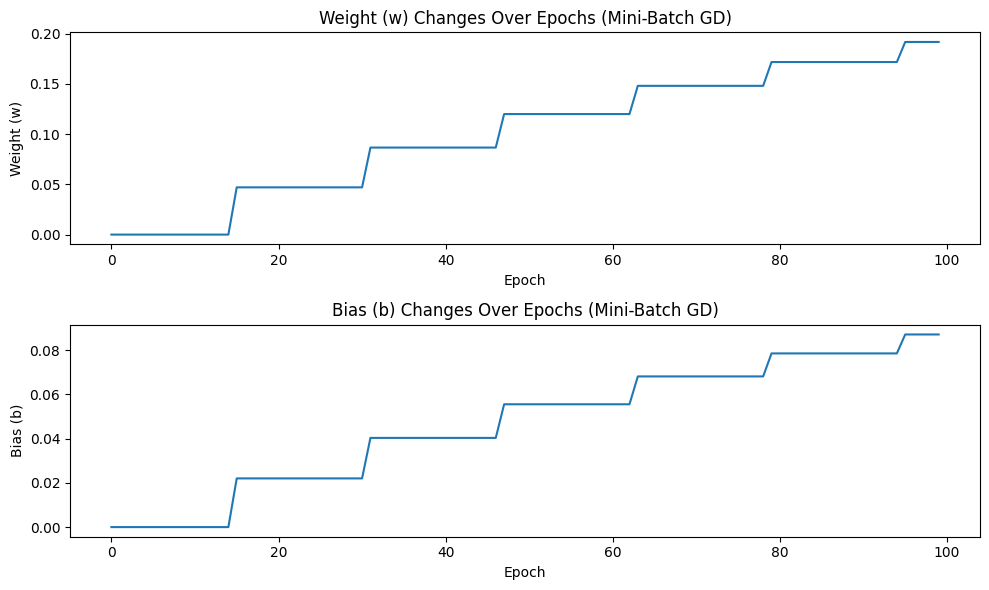

Momentum Gradient Descent: w = 0.33, b = 0.07


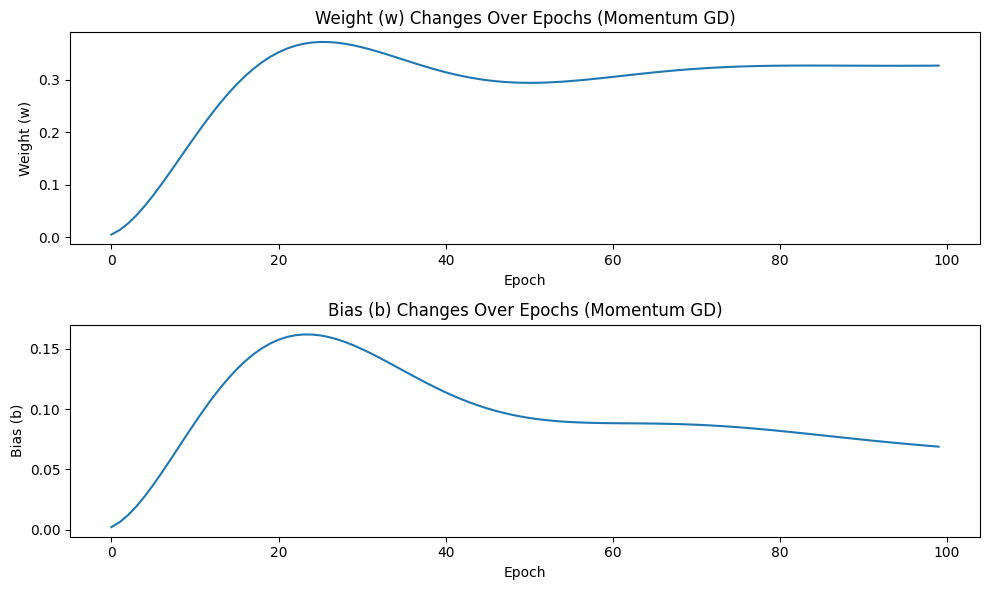

AdaGrad Gradient Descent: w = 0.36, b = 0.0


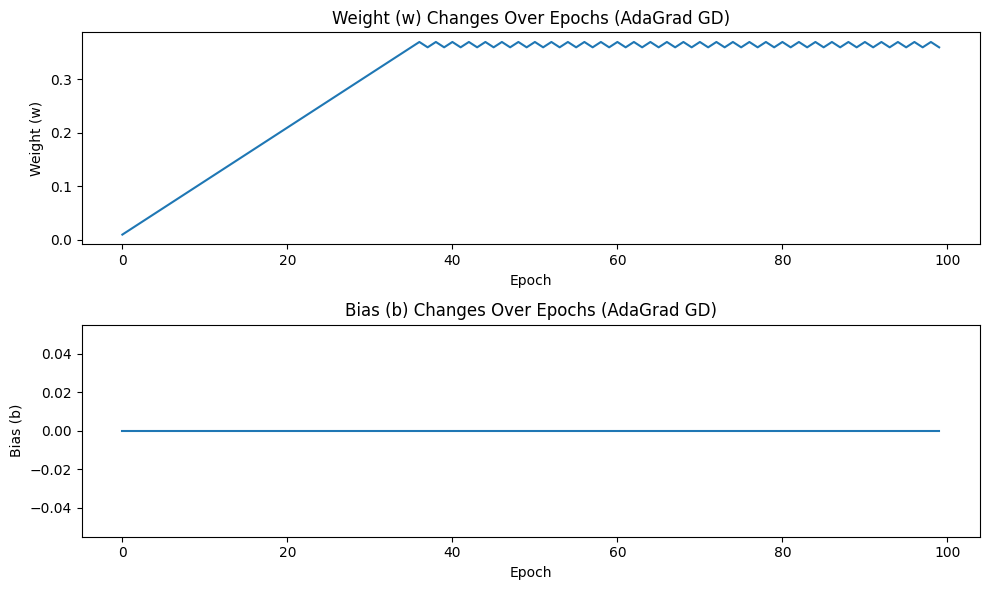

NAG Gradient Descent: w = 0.36, b = 0.0


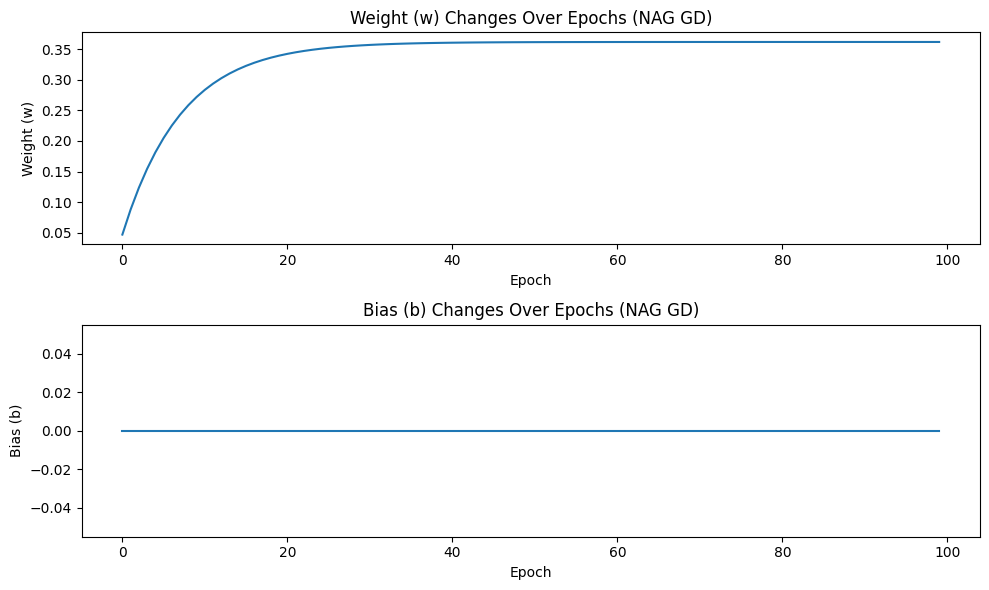

Adam Optimization: w = 0.35, b = 0.02


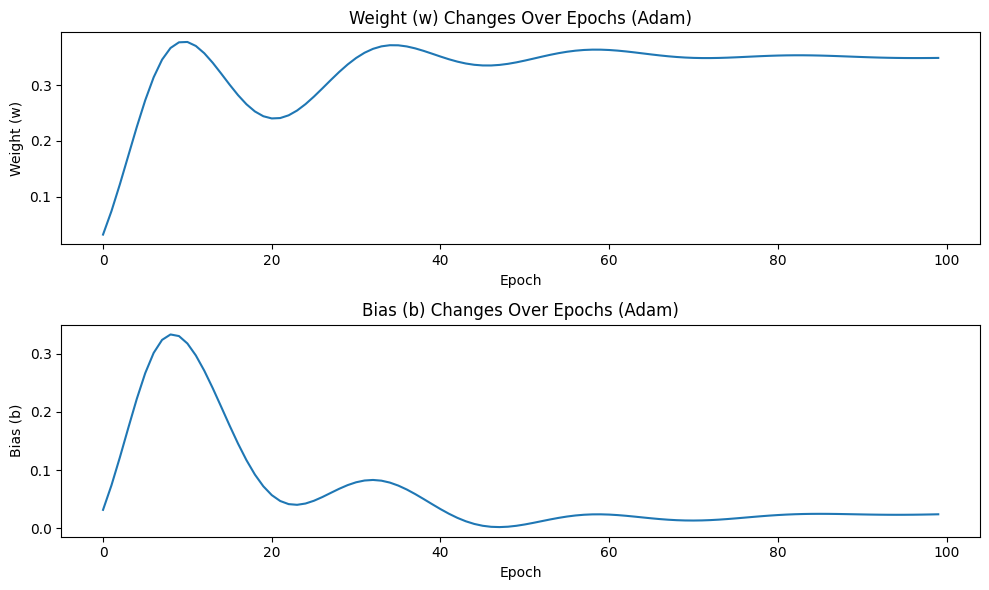

In [ ]:
#  Mini-Batch Gradient Descent
w_mini_batch = 0.0
b_mini_batch = 0.0
epoch_mini_batch = 100
n_mini_batch = 0.01
batch_size_mini_batch = 32
mini_batch_gradient_descent(X, Y, w_mini_batch, b_mini_batch, epoch_mini_batch, n_mini_batch, batch_size_mini_batch)

# Momentum Gradient Descent
w_momentum = 0.0
b_momentum = 0.0
epoch_momentum = 100
n_momentum = 0.01
beta_momentum = 0.9
momentum_gradient_descent(X, Y, w_momentum, b_momentum, epoch_momentum, n_momentum, beta_momentum)

#  AdaGrad Gradient Descent
w_ada_grad = 0.0
b_ada_grad = 0.0
epoch_ada_grad = 100
n_ada_grad = 0.01
eps_ada_grad = 1e-7
adaGrad_gradient_descent(X, Y, w_ada_grad, b_ada_grad, epoch_ada_grad, n_ada_grad, eps_ada_grad)

#  NAG Gradient Descent
w_nag = 0.0
b_nag = 0.0
epoch_nag = 100
n_nag = 0.01
beta_nag = 0.9
NAG_gradient_descent(X, Y, w_nag, b_nag, epoch_nag, n_nag, beta_nag)

#  Adam Optimization
w_adam = 0.0
b_adam = 0.0
epoch_adam = 100
n_adam = 0.01
eps_adam = 1e-7
beta1_adam = 0.9
beta2_adam = 0.999
Adam(X, Y, w_adam, b_adam, epoch_adam, n_adam, eps_adam, beta1_adam, beta2_adam)
